In [60]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns


font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df1=pd.read_csv("./output/project/wavve.csv")

In [61]:
df1

,movie_title_list,영화장르,영화세부장르
0,F20,스릴러,NaN
1,007 스펙터,액션,NaN
2,007 카지노 로얄,액션,NaN
3,마스터,범죄,NaN
4,(자막) 해리포터와 마법사의 돌,판타지,NaN
...,...,...,...
95,족구왕,코미디,NaN
96,데어 윌 비 블러드,드라마,NaN
97,신의 한 수,범죄,NaN
98,007 언리미티드,액션,NaN


In [62]:
wavveGR=df1.loc[:,["영화장르"]]

In [63]:
wavve=df1.loc[:,["movie_title_list"]]

In [64]:
wavveGR

,영화장르
0,스릴러
1,액션
2,액션
3,범죄
4,판타지
...,...
95,코미디
96,드라마
97,범죄
98,액션


In [65]:
wavveGR=wavveGR.apply(pd.value_counts)

In [66]:
####################################시각화######################################################################

Figure(1080x1080)
AxesSubplot(0.125,0.125;0.775x0.755)


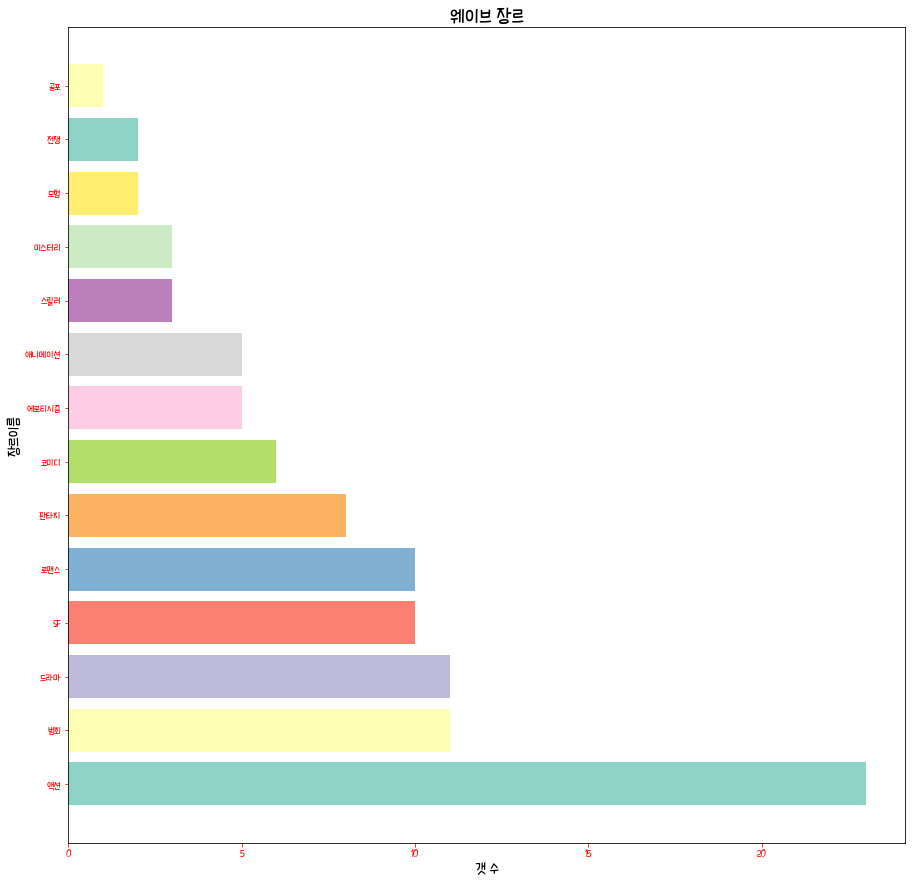

In [67]:
plt.figure(figsize=(15,15))
print(plt.gcf())
s = wavveGR

plt.title("웨이브 장르",size=20)
plt.ylabel('장르이름',size=15)
plt.xlabel('갯 수',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.영화장르,color=mycolors)
#plt.show()
plt.savefig('./output/project/웨이브 장르.png')

In [73]:
wavveGR

,영화장르
액션,23
범죄,11
드라마,11
SF,10
로맨스,10
판타지,8
코미디,6
에로티시즘,5
애니메이션,5
스릴러,3


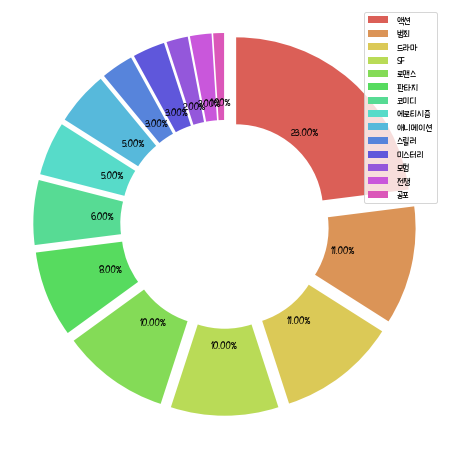

In [74]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(wavveGR.index)):
    explode.append(0.1)

pie = ax.pie(wavveGR.영화장르,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],wavveGR.index) ## 범례 표시
plt.show()

In [51]:
wavveGR
percent=[]
for i in range(len(wavveGR.index)):
    percent.append((wavveGR.영화장르[i]))

In [52]:
wavveGR=wavveGR.rename(columns={'영화장르':'cnt'})
wavveGR

,cnt
액션,23
범죄,11
드라마,11
SF,10
로맨스,10
판타지,8
코미디,6
에로티시즘,5
애니메이션,5
스릴러,3


In [56]:
cntsum=pd.DataFrame(wavveGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(wavveGR.cnt[0]/cntsum.a)*100

wavveGR
a=[]
for i in range(len(wavveGR.index)):
    a.append((wavveGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(wavveGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

wavveGR1=wavveGR.reset_index()
wavveGR1=pd.concat([wavveGR1,percent],axis=1)
wavveGR1
wavveGR1.set_index('index',inplace=True)

In [57]:
wavveGR1
#wavveGR1.to_csv('./output/project/웨이브장르_퍼센트.csv')

,cnt,percent
index,,
액션,23,23.0
범죄,11,11.0
드라마,11,11.0
SF,10,10.0
로맨스,10,10.0
판타지,8,8.0
코미디,6,6.0
에로티시즘,5,5.0
애니메이션,5,5.0
